In [1]:
import pandas as pd
import numpy as np
import datetime
import os as os
import matplotlib.pyplot as plt

# Set so jupyter displays all columns
pd.set_option('display.max_columns', False)


In [3]:
os.chdir('../data/interim')

In [4]:
os.listdir()

['joined data post-markdowns.csv', 'joined data pre-markdowns.csv', '.gitkeep']

In [5]:
df1 = pd.read_csv('joined data pre-markdowns.csv')
df2 = pd.read_csv('joined data post-markdowns.csv')

In [8]:
df3 = df1.drop(['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'], axis=1)

In [11]:
s1d1 = df3.loc[df3['Store'] == 1].loc[df3['Dept']==1]

In [12]:
s1d1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-01-10,20094.19,False,71.89,2.603,211.671989,7.838,A,151315
2935,1,1,2010-02-04,57258.43,False,62.27,2.719,210.820450,7.808,A,151315
5884,1,1,2010-02-07,16333.14,False,80.91,2.669,211.223533,7.787,A,151315
8801,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
11778,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315


In [16]:
s1d1 = s1d1.drop(['Store', 'Dept', 'Type', 'Size'], axis=1)

In [22]:
s1d1.set_index('Date', inplace=True)

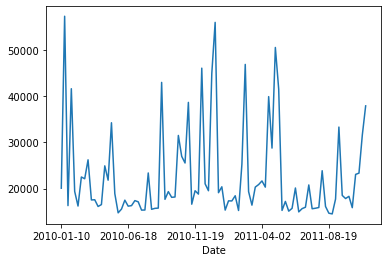

In [24]:
s1d1['Weekly_Sales'].plot()